/home/daniel/anaconda3/envs/rl-baselines-zoo-cu113/lib/python3.8/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


argv[0]=
[-1.  1.  1. -1.]
Randomize duty factor:  True
Randomize gait freq:  True
Period:  0.8771324000961687
Duty factor:  0.7788135618351706
[[ 0.09598173 -0.9953831 ]
 [-0.09598173  0.9953831 ]
 [-0.09598173  0.9953831 ]
 [ 0.09598173 -0.9953831 ]]
argv[0]=
[ 1. -1. -1.  1.]
Randomize duty factor:  True
Randomize gait freq:  True
Period:  0.8879221005589264
Duty factor:  0.8278745903982168
[[-0.99931617  0.03697558]
 [ 0.99931617 -0.03697558]
 [ 0.99931617 -0.03697558]
 [-0.99931617  0.03697558]]
argv[0]=
[-1.  1.  1. -1.]
Randomize duty factor:  True
Randomize gait freq:  True
Period:  0.7602051365566684
Duty factor:  0.7182798983444804
[[-0.71763444 -0.69641999]
 [ 0.71763444  0.69641999]
 [ 0.71763444  0.69641999]
 [-0.71763444 -0.69641999]]


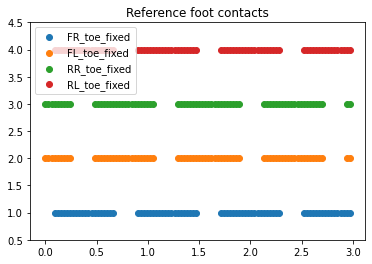

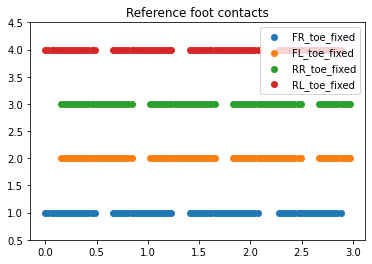

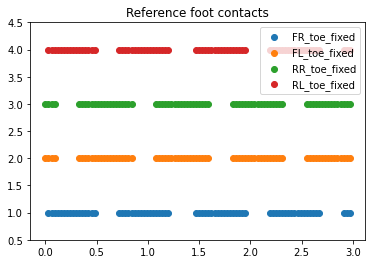

In [10]:
# Export butterworth filter coefficients and history
import gym 
import numpy as np
import utils.import_envs
from stable_baselines3.common.utils import set_random_seed
import matplotlib.pyplot as plt

for i in range(3):
    env = gym.make("A1GymEnv-v0", gait_name = "trot")
    foot_names = env.robot.GetFootNames()
    env.reset()
    obs = env.get_observation()
    sensors = env.all_sensors()
    print(obs['ReferenceGait_flatten'])
    
    ref_sensor = sensors[-1]
    print("Randomize duty factor: ", ref_sensor._randomize_duty_factor)
    print("Randomize gait freq: ", ref_sensor._randomize_gait_frequency)

    print("Period: ", ref_sensor.get_period())
    print("Duty factor: ", ref_sensor.get_duty_factor())
    print(sensors[-1].cpg_system.get_state())

    ref_contacts = np.zeros((100, 4))
    for i in range(100):
        obs, r, d, info = env.step(env.action_space.sample())
        ref_contacts[i] = obs[-4:]

    time = np.arange(100) * env.env_time_step
    plt.figure()
    plt.title(f"Reference foot contacts")
    plt.ylim(0.5, 4.5)
    for i in range(4):    
        plt.scatter(time, ref_contacts[:, i] * (i+1), label = foot_names[i])
    plt.legend()

